In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = yf.Ticker('BTC-USD').history(period='Max')

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,67760757880,0,0
2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,57706187875,0,0
2021-01-17,36163.648438,36722.351562,34069.320312,35791.277344,52359854336,0,0


In [4]:
data = df.filter(['Close'])
data

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-01-15,36825.367188
2021-01-16,36178.140625
2021-01-17,35791.277344


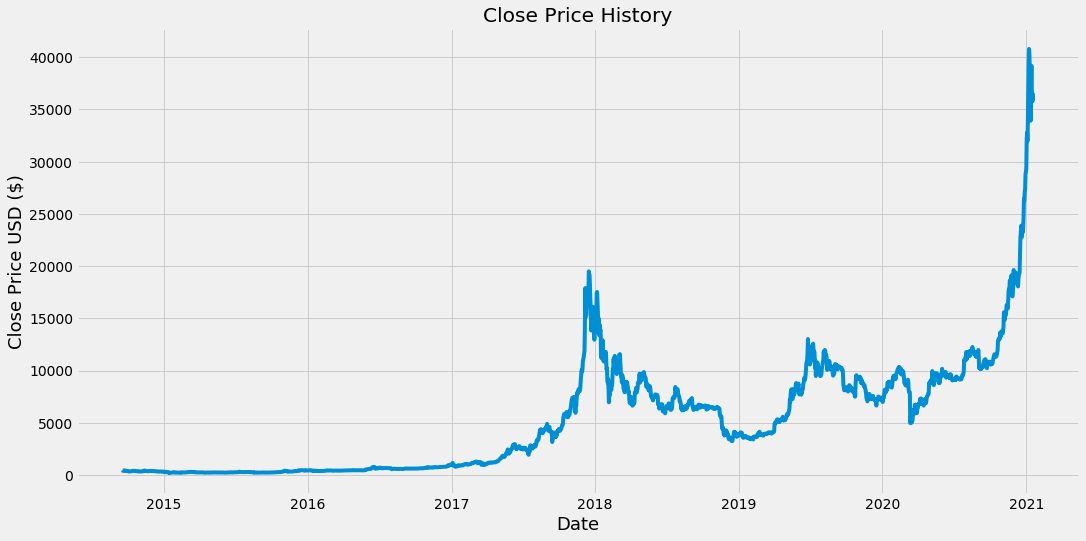

In [5]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
# Convert dataframe to numpy array
dataset = data.values

In [7]:
dataset

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [35791.27734375],
       [36630.07421875],
       [36646.43359375]])

In [8]:
df1=scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [9]:
print(df1)

[[0.00687431]
 [0.0060645 ]
 [0.0053347 ]
 ...
 [0.87675054]
 [0.89740064]
 [0.89780339]]


In [11]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(1853, 464)

In [13]:
len(train_data), len(test_data)

(1853, 464)

In [14]:
train_data

array([[0.00687431],
       [0.0060645 ],
       [0.0053347 ],
       ...,
       [0.20048628],
       [0.20085061],
       [0.20046779]])

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.00687431 0.0060645  0.0053347  ... 0.00385207 0.00355571 0.0034689 ]
 [0.0060645  0.0053347  0.00568202 ... 0.00355571 0.0034689  0.0036884 ]
 [0.0053347  0.00568202 0.00543379 ... 0.0034689  0.0036884  0.00339147]
 ...
 [0.26153875 0.2900864  0.27172498 ... 0.19861197 0.19819739 0.2072314 ]
 [0.2900864  0.27172498 0.2658909  ... 0.19819739 0.2072314  0.20700327]
 [0.27172498 0.2658909  0.27155544 ... 0.2072314  0.20700327 0.20048628]]


In [18]:
print(X_train.shape), print(y_train.shape)

(1752, 100)
(1752,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(363, 100)
(363,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 32,551
Trainable params: 32,551
Non-trainable params: 0
_________________________________________________________________


In [31]:
# give best model loop
rmse = 4000
while rmse > 3550:
    # Train the model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape= (100, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=10, batch_size=64, verbose=1)
#     model.fit(x_train, y_train, batch_size=1, epochs=1)
    # Create the testing data set
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)
    rmse = np.sqrt( np.mean( y_train - train_predict )**2 )
    rmse2 = np.sqrt( np.mean( ytest - test_predict )**2 )
    print(rmse)
    print(rmse2)

Epoch 1/10
28/28 [==============================] - 5s 100ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 2/10
28/28 [==============================] - 2s 80ms/step - loss: 3.9353e-04 - val_loss: 0.0022
Epoch 3/10
28/28 [==============================] - 2s 79ms/step - loss: 2.4847e-04 - val_loss: 0.0012
Epoch 4/10
28/28 [==============================] - 2s 79ms/step - loss: 2.4215e-04 - val_loss: 0.0027
Epoch 5/10
28/28 [==============================] - 2s 79ms/step - loss: 2.9335e-04 - val_loss: 0.0019
Epoch 6/10
28/28 [==============================] - 2s 79ms/step - loss: 2.0449e-04 - val_loss: 0.0032
Epoch 7/10
28/28 [==============================] - 2s 79ms/step - loss: 2.5427e-04 - val_loss: 0.0019
Epoch 8/10
28/28 [==============================] - 2s 79ms/step - loss: 1.8920e-04 - val_loss: 0.0021
Epoch 9/10
28/28 [==============================] - 2s 81ms/step - loss: 1.6723e-04 - val_loss: 0.0019
Epoch 10/10
28/28 [==============================] - 2s 80ms/step - loss: 1.

###TEST----------------

In [90]:
# Train the model

model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=10, batch_size=64, verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 143ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 2/100
28/28 [==============================] - 3s 106ms/step - loss: 6.0007e-04 - val_loss: 0.0038
Epoch 3/100
28/28 [==============================] - 3s 104ms/step - loss: 3.9398e-04 - val_loss: 0.0050
Epoch 4/100
28/28 [==============================] - 3s 104ms/step - loss: 3.3671e-04 - val_loss: 0.0045
Epoch 5/100
28/28 [==============================] - 3s 105ms/step - loss: 2.8916e-04 - val_loss: 0.0032
Epoch 6/100
28/28 [==============================] - 3s 106ms/step - loss: 2.5174e-04 - val_loss: 0.0055
Epoch 7/100
28/28 [==============================] - 3s 106ms/step - loss: 2.7981e-04 - val_loss: 0.0043
Epoch 8/100
28/28 [==============================] - 3s 104ms/step - loss: 2.4635e-04 - val_loss: 0.0034
Epoch 9/100
28/28 [==============================] - 3s 104ms/step - loss: 2.5285e-04 - val_loss: 0.0031
Epoch 10/100
28/28 [==============================] - 3s 10

In [91]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [92]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [94]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5643.470046841075

In [95]:
math.sqrt(mean_squared_error(ytest,test_predict))

13741.205060742634

###TEST--------------

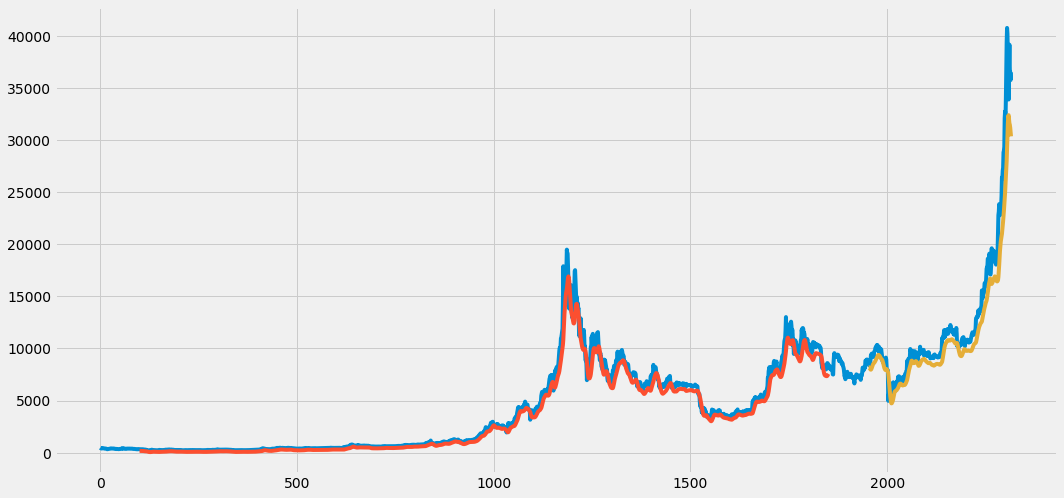

In [32]:
look_back = 100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
# predict for next 30 days
lst_output=[]
n_steps=100
i=0

while i<30:
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)    
    


[0.7274294]
101
1 day input [0.27690628 0.27699509 0.27861605 0.27435144 0.27523718 0.27832087
 0.28468918 0.28898017 0.31131807 0.31481891 0.31397319 0.31831897
 0.31642607 0.31751112 0.33176464 0.3223373  0.32643872 0.32911329
 0.33488571 0.3338053  0.32921095 0.33905379 0.34356902 0.37917117
 0.3788273  0.36080327 0.37670237 0.37307722 0.37205768 0.38216212
 0.39631798 0.39733879 0.39119224 0.38842138 0.40714449 0.43002254
 0.43392706 0.43424917 0.45404814 0.45456312 0.44786115 0.44771637
 0.46601654 0.45677606 0.41784161 0.41680219 0.43179528 0.44312162
 0.47877817 0.45852096 0.46832152 0.47433603 0.45597951 0.46716785
 0.47186733 0.4680886  0.44665835 0.45238888 0.44527595 0.44020233
 0.45853716 0.46687618 0.46944297 0.47363877 0.52025484 0.55704909
 0.56524217 0.5832599  0.57359614 0.55699788 0.58112292 0.56778737
 0.57996387 0.60283076 0.64646118 0.64240544 0.66240848 0.66924335
 0.7056425  0.70960039 0.71876918 0.78654734 0.80266658 0.78272273
 0.83246523 0.90218379 0.96487977 

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(1,101)

In [37]:
len(df1)

2317

In [38]:
df3=df1.tolist()
df3.extend(lst_output)

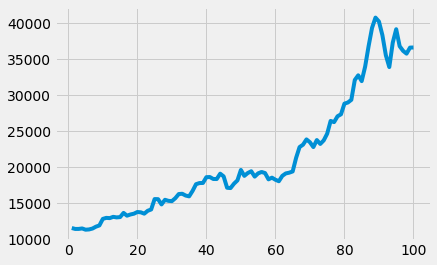

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [159]:
# plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [160]:
# scaler.inverse_transform(lst_output)

In [161]:
# scaler.inverse_transform(df1[len(df1)-100:])

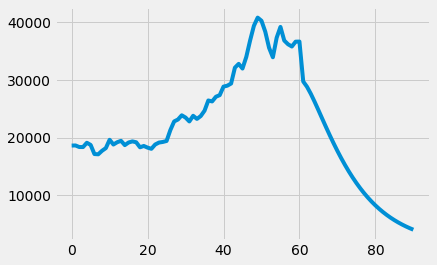

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(df3[2256:]))

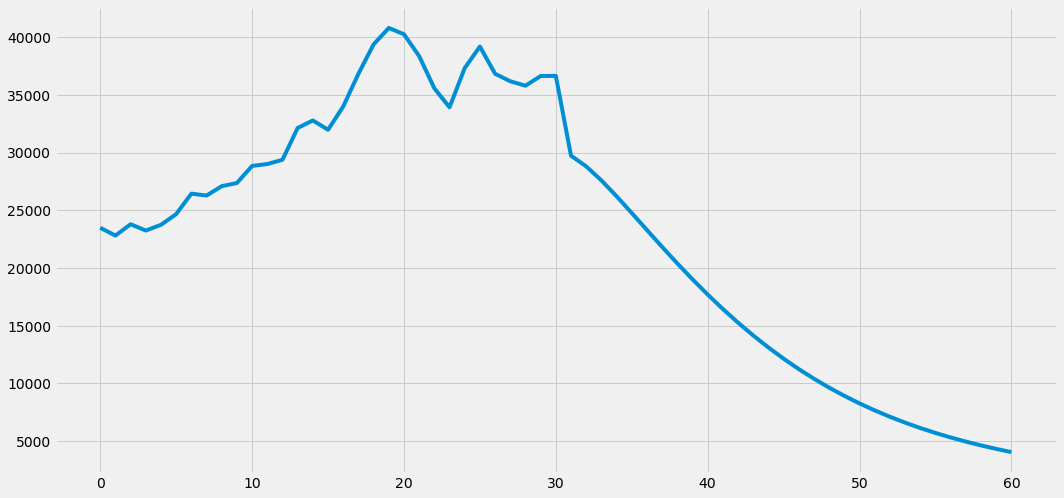

In [41]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df3[2286:]))

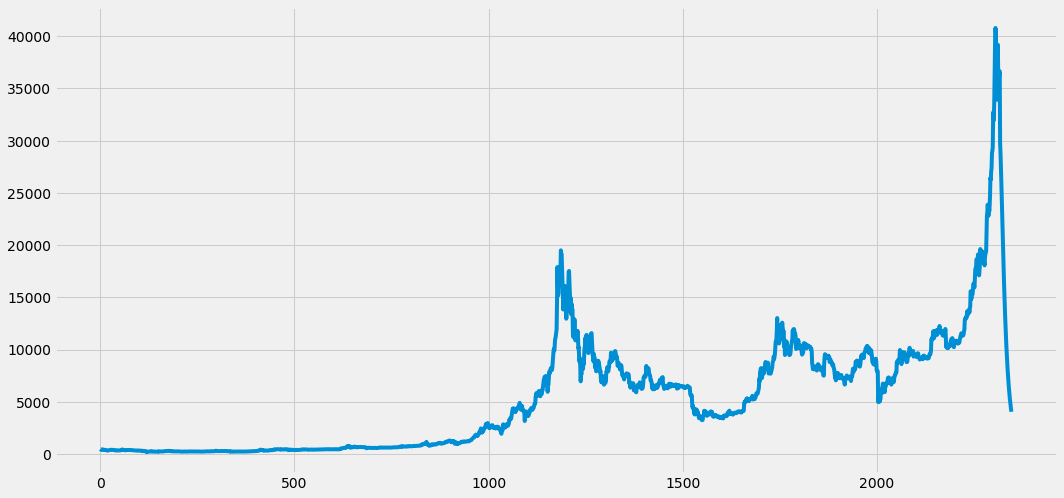

In [42]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df3))

In [165]:
scaler.inverse_transform(df3[2286:])

array([[23477.29492187],
       [22803.08203125],
       [23783.02929688],
       [23241.34570312],
       [23735.94921875],
       [24664.79101562],
       [26437.03710937],
       [26272.29492188],
       [27084.80859375],
       [27362.4375    ],
       [28840.953125  ],
       [29001.72070312],
       [29374.15234375],
       [32127.26757812],
       [32782.0234375 ],
       [31971.9140625 ],
       [33992.4296875 ],
       [36824.36328125],
       [39371.04296875],
       [40797.609375  ],
       [40254.546875  ],
       [38356.44140625],
       [35566.65625   ],
       [33922.9609375 ],
       [37316.359375  ],
       [39187.328125  ],
       [36825.3671875 ],
       [36178.140625  ],
       [35791.27734375],
       [36916.94140625],
       [33920.30244883],
       [27639.56943989],
       [24154.60980306],
       [24233.63729533],
       [25482.60142849],
       [26145.89390838],
       [25671.52800255],
       [24448.45039086],
       [23216.87225758],
       [22450.0336918 ],
